In [2]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
import numpy as np
from tqdm import tqdm
import h5py
import tifffile as tiff
from typing import Literal

sys.path.append(str(Path("..").resolve()))
from src import *

/leonardo_scratch/fast/IscrC_MACRO/CalciumImagingDenoising/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualize Dataset

## CNNT Dataset

In [ ]:
dataset_dir = Path("dataset/Denoising/")
datasets = sorted(dataset_dir.glob("*"))
cprint(
    "The available datasets are:\n",
    *[f"rand:{_.stem}" for _ in datasets],
)

The available datasets are:
 Actin ER Golji Lysosome Matrix_Mitochondria Microtubule Tomm20_Mitochondria


In [16]:
dataset = "Actin"
tif_index = 0

In [ ]:
raw_dir, gt_dir = (dataset_dir / dataset / "Training" / _ for _ in ["Raw", "GT"])
footage = sorted(raw_dir.glob("*.tif"))[tif_index]
cprint(f"yellow:Reading {footage.stem}")
raw = Recording(footage, max_frames=None)
gt = Recording(gt_dir / f"{footage.stem}_decon.tif", max_frames=None)

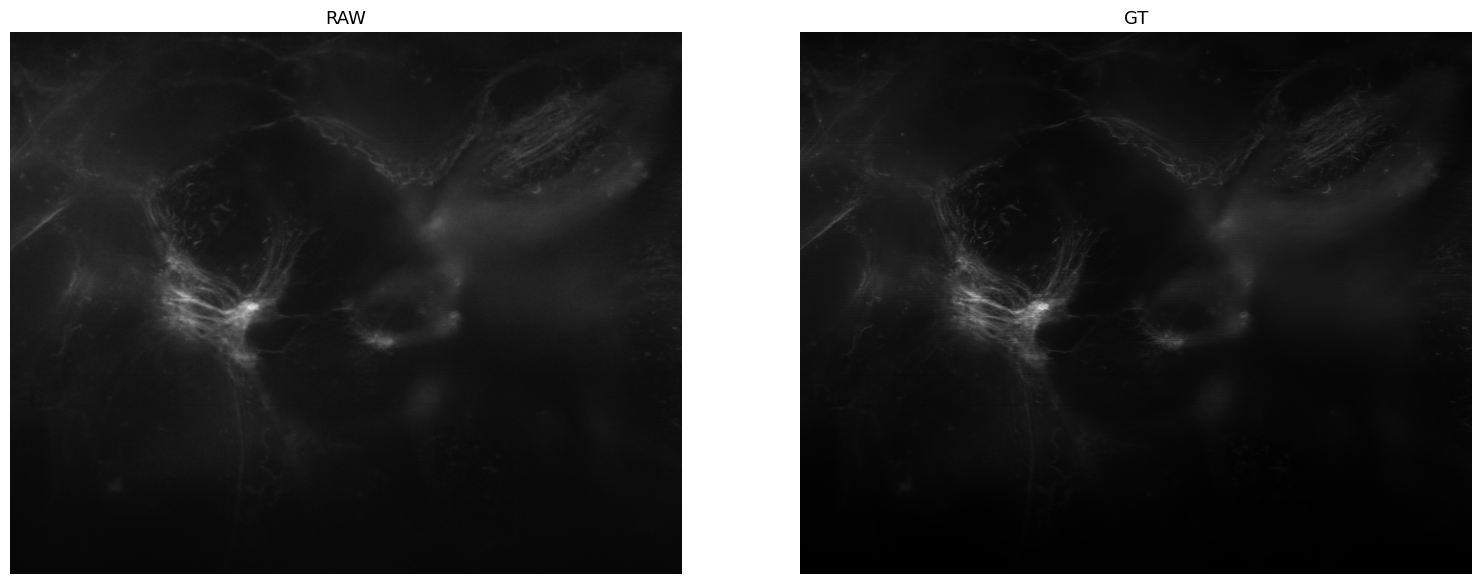

In [24]:
imshow({"RAW": raw.np[0], "GT": gt.np[0]}, size=8)

In [27]:
gt.render(f"{dataset}_Training_{tif_index}_gt.mp4")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1550) to (1920, 1552) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


## OABF Dataset

In [5]:
dataset_dir = Path("dataset/")
datasets = sorted(dataset_dir.glob("*.h5"))
cprint(
    "The available datasets are:\n",
    *[f"rand:{_.stem}" for _ in datasets],
)

The available datasets are:
 oabf_astro


In [ ]:
dataset = "oabf_astro"

In [ ]:
h5file = h5py.File(dataset_dir / f"{dataset}.h5", libver="latest", mode="r")
cprint(
    "The available footages are:\n",
    *[f"rand:{_}" for _ in h5file.keys()],
)

The available footages are:
 0 1350 2025 2700 3375 4050 4725 5400 6075 675 6750 7425 8100 8775 9450


In [ ]:
footage = "2700"

In [16]:
raw, gt = (np.array(h5file[footage][_]) for _ in ["noisy_im", "clean_im"])

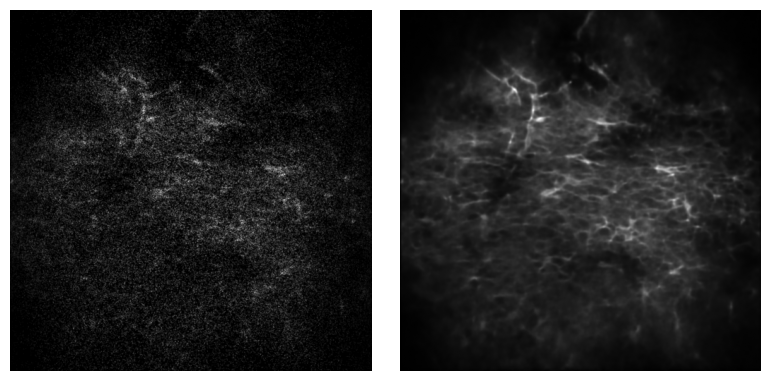

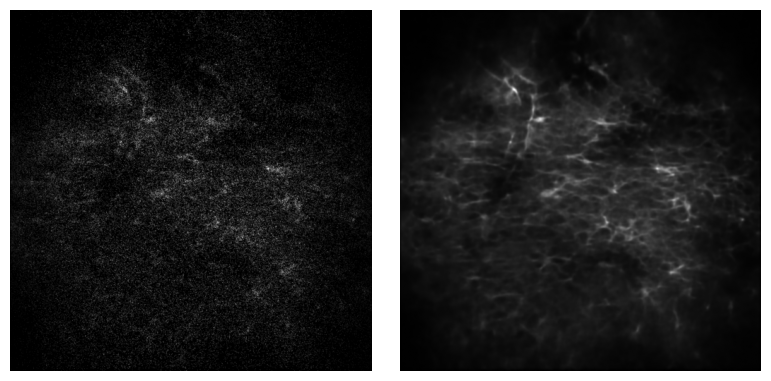

In [19]:
for i in range(0, raw.shape[0], 8):
    imshow([raw[i], gt[i]])